In [1]:
import sys
#sys.path.insert(0, '/Users/qd/PycharmProjects/rydanalysis/')
from rydanalysis import *
import matplotlib.pyplot as plt
import importlib
#path='/run/user/1000/gvfs/smb-share:server=axion.local,share=rydberg/data/2020_02_12/EIT_resonancescan'
import seaborn as sns
from pathlib import Path
sns.set_style("dark")
sns.set_style("darkgrid")
import matplotlib as mpl
path='/Users/qd/Desktop/DATA/01_Twolevel_versus_Threelevel_pABSx0-8_pBlue15mV/'
path = Path(path)

In [2]:
seq = rydanalysis.OldStructure(path)
#seq.path='/Users/qd/Schreibtisch/DATA/'

'raw_data.h5' already exists. Do you want to load from this file (Y) or from the old folder structure (N)? [Y/n]: 

In [3]:
seq.save_raw_data()

C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


10
10


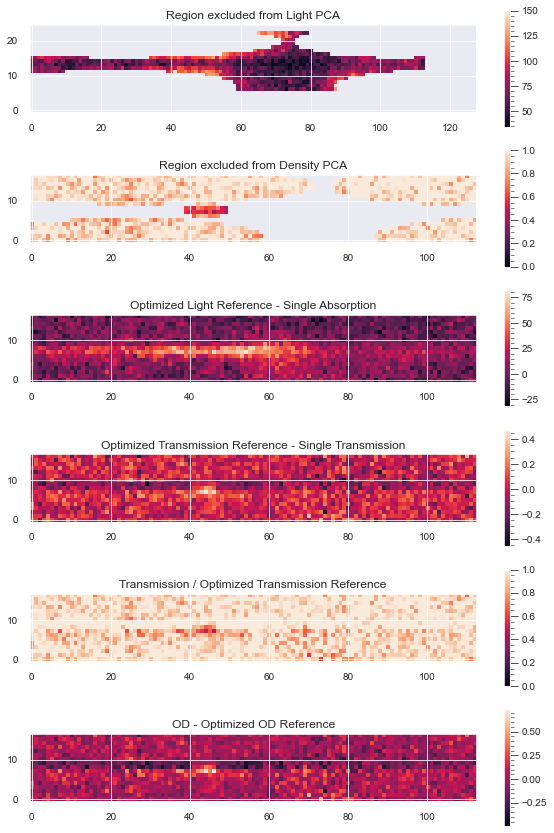

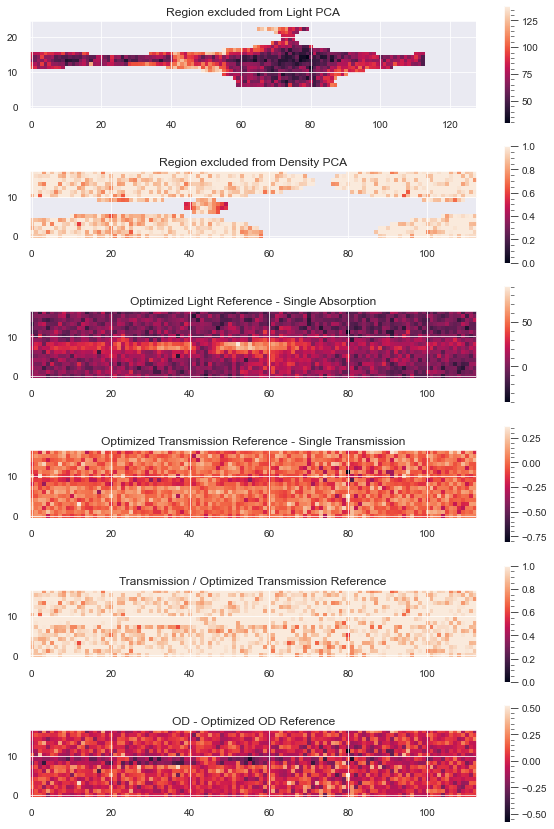

In [19]:
importlib.reload(rydanalysis)
from rydanalysis import *
data = seq.raw_data#.groupby('Test1').mean()

#mask = (abs(images.x)) * (abs(images.y))
#image = images.image_01.sel(dDDSred=0, method='nearest').where(mask)/images.image_03.sel(dDDSred=0, method='nearest').where(mask)#-images.image_05.sel(dDDSred=0, method='nearest').where(mask)
two_level = EITMask(image = data.image_01).get_mask(center_x=12,center_y=-180,width_x=10,width_y=400,width_eit=35)

elliptical =~ (EllipticalMask(image = data.image_01).get_mask(center_x=-45,center_y=-340,width_x=40,width_y=300) +
                   EllipticalMask(image = data.image_01).get_mask(center_x=65,center_y=-330,width_x=40,width_y=400) +
                   EllipticalMask(image = data.image_01).get_mask(center_x=-45,center_y=450,width_x=40,width_y=250) +
                   EllipticalMask(image = data.image_01).get_mask(center_x=65,center_y=350,width_x=40,width_y=250))/4

roi = (EllipticalMask(image = data.image_01).get_mask(center_x=-45,center_y=-340,width_x=40,width_y=300) +
        EllipticalMask(image = data.image_01).get_mask(center_x=65,center_y=-330,width_x=40,width_y=400) +
          EllipticalMask(image = data.image_01).get_mask(center_x=-45,center_y=450,width_x=40,width_y=250) +
            EllipticalMask(image = data.image_01).get_mask(center_x=65,center_y=350,width_x=40,width_y=250) +
              EllipticalMask(image = data.image_01).get_mask(center_x=12,center_y=-168,width_x=15,width_y=50))/5

crop = RectangularMask(image = data.image_01).get_mask(center_x=18,center_y=-175, width_x=70, width_y=600)

IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=roi,crop_mask=crop,
                                             absorption_ref_kwargs=dict(Test1=1),
                                             pca_kwargs=dict(n_components=10),pca_density_kwargs=dict(n_components=10))
#AI=AbsorptionImaging.from_raw_data(seq.raw_data,crop_mask=crop)

#print(absorptionpic.calculate_density(images.image_01.sel(tEXC=0, method='nearest')))
#print(center_of_mass(imag[n].where(eit_roi)))

trans=IEI.transmission
deltatrans=IEI.transmission_ratio
deltaod=IEI.delta_optical_depth

light_ref=IEI.optimized_reference_images(IEI.absorption_images)#IEI.transmission_reference
density_ref=IEI.optimized_transmission_reference(IEI.transmission)
single=IEI.absorption_images

#AIimag=AI.transmission

for n in range(1,3):

    fig,ax = plt.subplots(6,figsize=(10,15))
    pic=0
    #ax[0].set_title('Absorption / Light Reference')
    #ax[0].imshow(AIimag[n].where(elliptical), origin='bottom',vmin=0, vmax=1)
    #fig.colorbar(ax[0].imshow(AIimag[n].where(elliptical), origin='bottom',vmin=0, vmax=1),ax=ax[0])
    ax[pic].set_title('Region excluded from Light PCA')
    ax[pic].imshow(single[n].where(elliptical),  origin='bottom')
    fig.colorbar(ax[pic].imshow(single[n].where(elliptical), origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Region excluded from Density PCA')
    ax[pic].imshow(trans[n].where(roi), vmin=0,vmax=1,origin='bottom')
    fig.colorbar(ax[pic].imshow(trans[n].where(roi), vmin=0,vmax=1, origin='bottom'),ax=ax[pic])
    pic+=1
    #ax[2].set_title('Single Shot Absorption')
    #ax[2].imshow(single[n], origin='bottom',vmin=40, vmax=150)
    #fig.colorbar(ax[2].imshow(single[n], origin='bottom',vmin=40, vmax=150),ax=ax[2])
    ax[pic].set_title('Optimized Light Reference - Single Absorption')
    ax[pic].imshow(light_ref[n]-single[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(light_ref[n]-single[n], origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Optimized Transmission Reference - Single Transmission')
    ax[pic].imshow(density_ref[n]-trans[n],  origin='bottom')
    fig.colorbar(ax[pic].imshow(density_ref[n]-trans[n],origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('Transmission / Optimized Transmission Reference')
    ax[pic].imshow(deltatrans[n],vmin=0,vmax=1, origin='bottom')
    fig.colorbar(ax[pic].imshow(deltatrans[n], vmin=0,vmax=1,origin='bottom'),ax=ax[pic])
    pic+=1
    ax[pic].set_title('OD - Optimized OD Reference')
    ax[pic].imshow(deltaod[n], origin='bottom')
    fig.colorbar(ax[pic].imshow(deltaod[n], origin='bottom'),ax=ax[pic])
    plt.show()

Single Images
4.109611128225128
Transmission Ratio SNR
4.116271
Delta OD SNR
3.811501


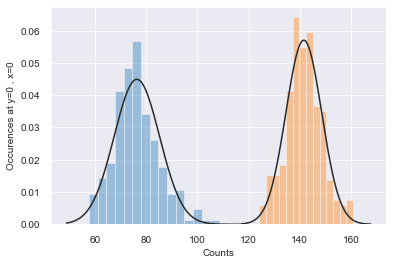

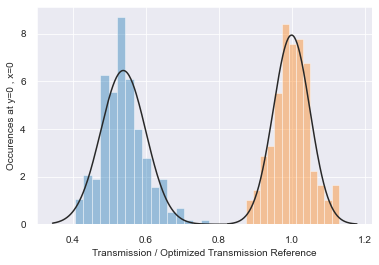

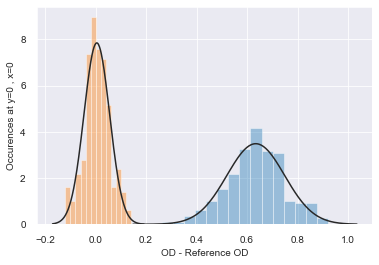

In [16]:
from scipy import stats
import seaborn as sns

for y in [0]:
    for x in [0]:
        singlelist=[]
        singlelist1=[]
        odlist=[]
        odlist1=[]
        odlist2=[]
        odlist3=[]
        for n in range(0,250):
            singlelist.append(single.sel(dict(Test1=0))[n].where(roi)[14,42:46].mean()*1.37)
            singlelist1.append(single.sel(dict(Test1=1))[n].where(roi)[14,42:46].mean()*1.37)
            odlist.append(deltaod.sel(dict(Test1=0))[n].where(roi)[8+y,42:46].mean())
            odlist1.append(deltaod.sel(dict(Test1=1))[n].where(roi)[8+y,42:46].mean())
            odlist2.append(deltatrans.sel(dict(Test1=0))[n].where(roi)[8+y,42:46].mean())
            odlist3.append(deltatrans.sel(dict(Test1=1))[n].where(roi)[8+y,42:46].mean())
        try:

            print('Single Images')
            print((stats.norm.fit(singlelist1)[0]-stats.norm.fit(singlelist)[0])/(stats.norm.fit(singlelist)[1]+stats.norm.fit(singlelist1)[1]))
            sns.distplot(singlelist, fit=stats.norm, kde=False)
            sns.distplot(singlelist1, fit=stats.norm, kde=False)
            plt.ylabel('Occurences at y=%.0f , x=%.0f' %(y,x))
            plt.xlabel('Counts')
            plt.show()
            print('Transmission Ratio SNR')
            print((stats.norm.fit(odlist3)[0]-stats.norm.fit(odlist2)[0])/(stats.norm.fit(odlist2)[1]+stats.norm.fit(odlist3)[1]))
            sns.distplot(odlist2, fit=stats.norm, kde=False)
            sns.distplot(odlist3, fit=stats.norm, kde=False)
            plt.xlabel('Transmission / Optimized Transmission Reference')
            plt.ylabel('Occurences at y=%.0f , x=%.0f' %(y,x))
            plt.show()
            print('Delta OD SNR')
            print((stats.norm.fit(odlist)[0]-stats.norm.fit(odlist1)[0])/(stats.norm.fit(odlist)[1]+stats.norm.fit(odlist1)[1]))
            sns.distplot(odlist, fit=stats.norm, kde=False)
            sns.distplot(odlist1, fit=stats.norm, kde=False)
            plt.xlabel('OD - Reference OD')
            plt.ylabel('Occurences at y=%.0f , x=%.0f' %(y,x))
            plt.show()
        except:
            print('Out of ROI')